# Stage 1 : Exploratory Data Analytics (EDA)

## 1.1 Import Library & Load Data

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textwrap import wrap
from matplotlib import rcParams

sns.set_style('darkgrid')
pal = sns.color_palette()

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
df = pd.read_csv('hotel_bookings_data.csv')

In [3]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.00,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.00,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.00,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.00,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.00,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,...,0,No Deposit,394.0,NaN,0,Personal,96.14,0,0,Check-Out
119386,City Hotel,0,102,2019,October,35,31,2,5,3,...,0,No Deposit,9.0,NaN,0,Personal,225.43,0,2,Check-Out
119387,City Hotel,0,34,2019,October,35,31,2,5,2,...,0,No Deposit,9.0,NaN,0,Personal,157.71,0,4,Check-Out
119388,City Hotel,0,109,2019,October,35,31,2,5,2,...,0,No Deposit,89.0,NaN,0,Personal,104.40,0,0,Check-Out


## 1.2 Descriptive Statistics

In [4]:
#General Information and Missing value check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### a. Missing Value

Note : 
- data children missing value 
- data city mssing value
- data agent missing value
- data company missing value

In [5]:
# Duplicated Value Check
df.duplicated().sum()

33261

Terdapat 33261 data duplikat

In [6]:
# Statistical Summary
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Note :
- Nilai rata - rata is_cancelled dan nilai quartile 2 terlalu jauh jaraknya menandakan ada outlier
- Nilai rata - rata lead_time dan nilai quartile 2 terlalu jauh jaraknya menandakan ada outlier
- Nilai rata - rata agent dan nilai quartile 2 terlalu jauh jaraknya menandakan ada outlier
- Nilai rata - rata agent dan nilai quartile 2 terlalu jauh jaraknya menandakan ada outlier
- Nilai rata - rata company dan nilai quartile 2 terlalu jauh jaraknya menandakan ada outlier
- Nilai rata - rata days_in_waiting_list 	 dan nilai quartile 2 terlalu jauh jaraknya menandakan ada outlier
- Nilai rata - rata adr dan nilai quartile 2 terlalu jauh jaraknya menandakan ada outlier
<br>**Dan terdistribusi skewD karena nilai mean jauh dengan nilai median**

Note :
- Perhatikan nilai Q3 dan nilai max, jika terlalu jauh berarti ada outlier


### Descriptive Statistics Summary 

1. Setiap kolom dan tipe datanya sudah sesuai ?
2. Ada kolom yang memiliki nilai kosong
3. Dari hasil describe diatas ada feature yang distribusinya skew

## 1.3 Univariate Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'meal',
       'city', 'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'deposit_type', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

In [9]:
# separate columns by numericals and categoricals
numericals = ['is_canceled','lead_time','arrival_date_year','arrival_date_week_number',
              'arrival_date_day_of_month','stays_in_weekend_nights','stays_in_weekdays_nights',
              'adults','children','babies','is_repeated_guest','previous_cancellations',
              'previous_bookings_not_canceled','booking_changes','agent','company','days_in_waiting_list',
              'adr','required_car_parking_spaces','total_of_special_requests']
categoricals = ['hotel','arrival_date_month','meal','city','market_segment','distribution_channel',
                'deposit_type','customer_type','reservation_status']

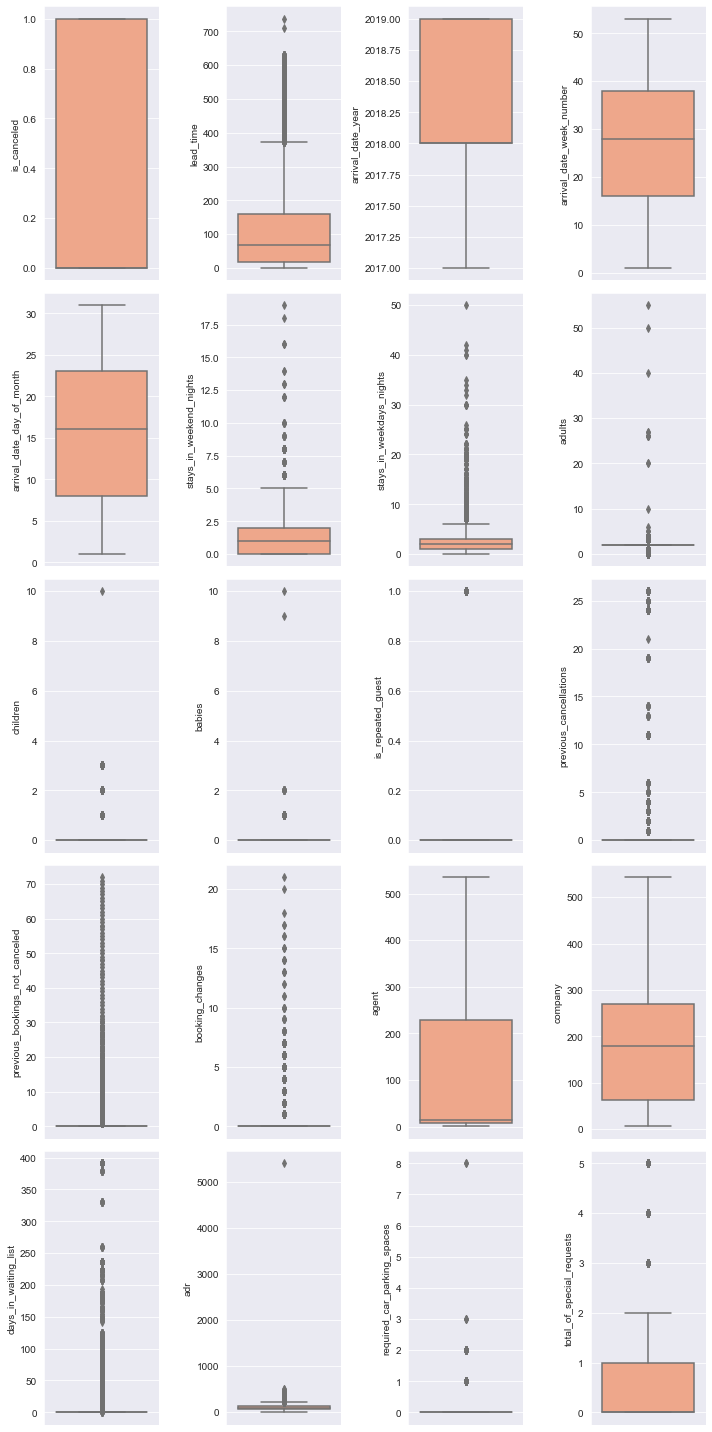

In [10]:
# Box plot 
feat_num = numericals
plt.figure(figsize=(10,20))
for i in range(0,len(feat_num)):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df[feat_num[i]], color = 'lightsalmon', orient = 'v')
    plt.tight_layout()

Dapat dilihat banyak kolom yang memiliki outlier dan cukup jauh dari nilai distribusi normalnya

In [11]:
df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

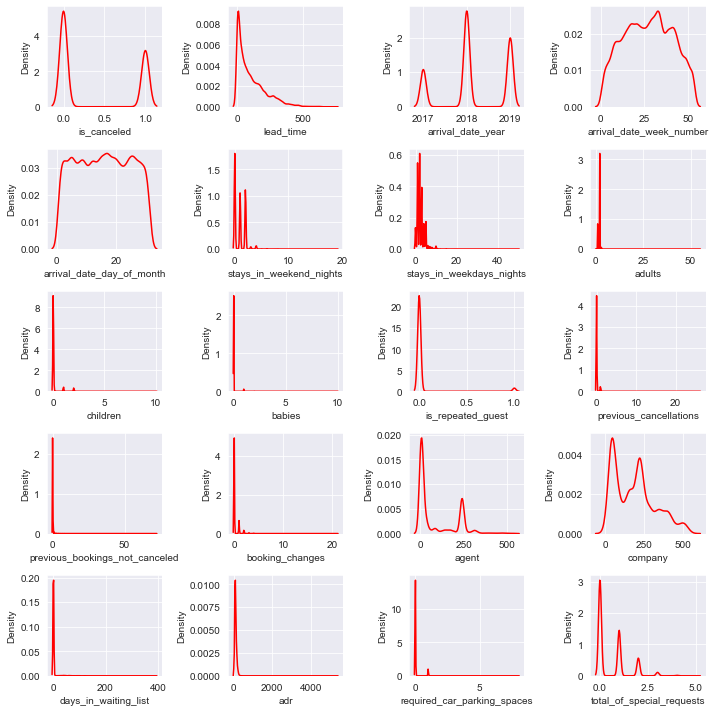

In [12]:
#Distplot
plt.figure(figsize=(10,10))
for i in range (0, len(feat_num)):
    plt.subplot(5,4,i+1)
    sns.kdeplot(x=df[feat_num[i]], color='red')
    plt.xlabel(feat_num[i])
    plt.tight_layout()

Dilihat dari hasil Distribusi Plot menggunakan KDE masih banyak feature yang distribusinya skew negatif.

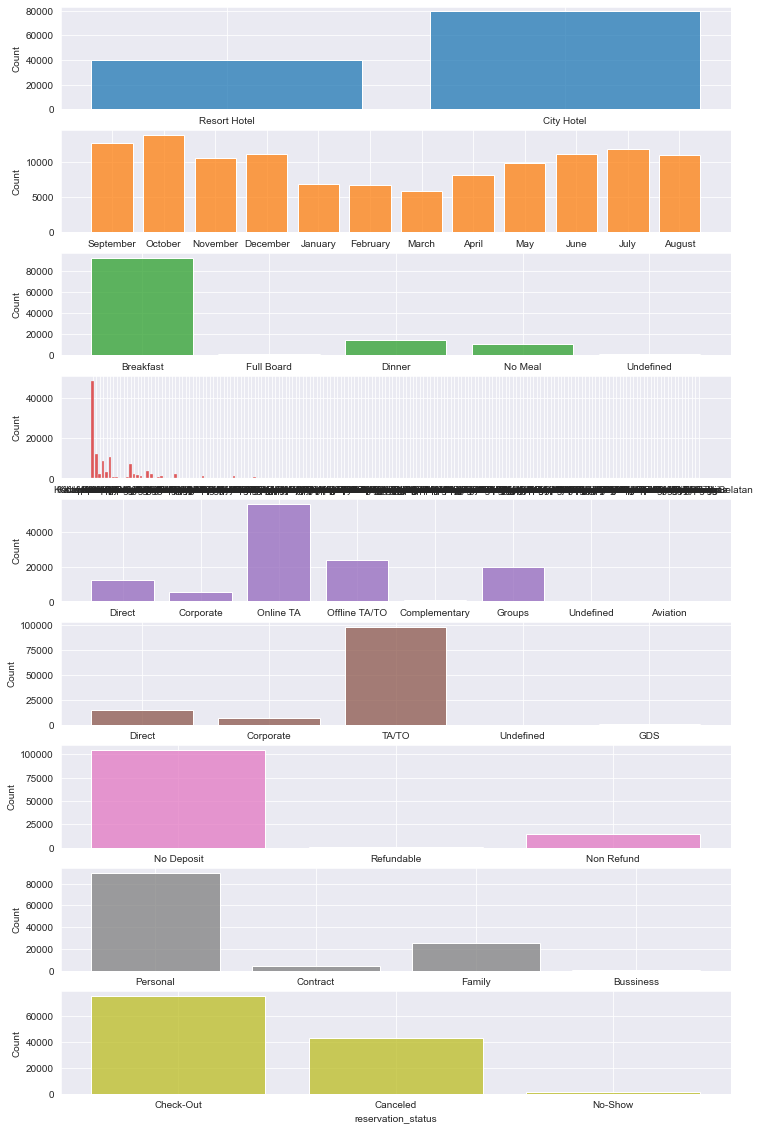

In [13]:
#countplot
feat_cat = categoricals
plt.figure(figsize=(12,20))
for i in range (0,len(feat_cat)):
    plt.subplot(9,1,i+1)
    sns.histplot(df[feat_cat[i]],color=pal[i],shrink=0.8)


## 1.4 Multivariate Analysis

<AxesSubplot:>

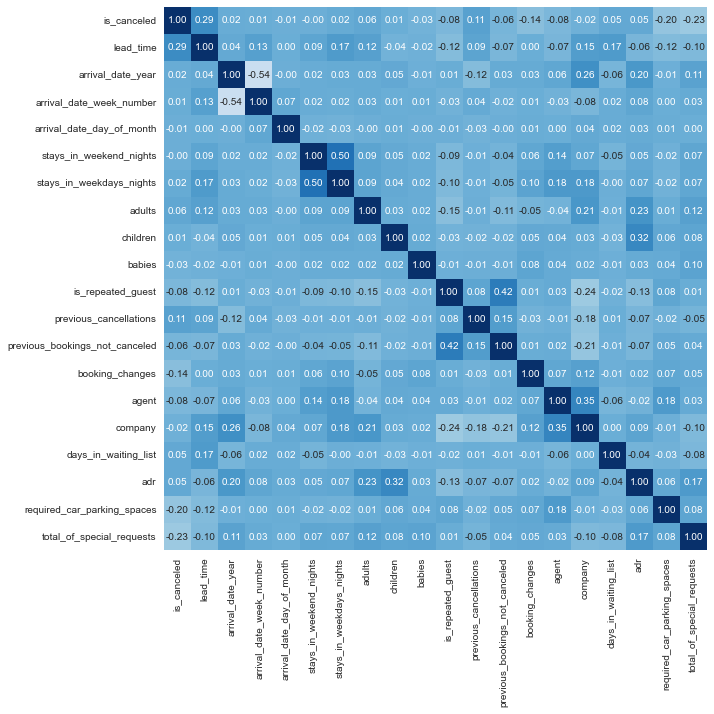

In [14]:
#Correlation for each numerical features
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, square = True, cmap='Blues', cbar = False, vmin=-1, vmax=1, fmt='.2f')

Dari hasil heatmap diatas :
- Tidak ada 2 feature yang redundan (>0.7)
- Korelasi positif tertinggi adalah :
    - Stay_in_weekdays_night dan Stay_in_weekend_nights (0.50)
    - previous_booking_is_cancelled dan is_repeated_guest (0.42) 
- Korelasi negatif tertinggi adalah :
    - Arrival_date_week_number dan Arrival_date_year (-0.54)

In [15]:
# #Scatter Plot
# plt.figure(figsize=(10,10))
# sns.pairplot(df, diag_kind = 'kde', hue='reservation_status')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [17]:
df['is_canceled'].unique()

array([0, 1], dtype=int64)

## 1.5 Business Insight

In [18]:
# #drop duplicate date
# df.drop_duplicates()
# df

In [19]:
# #Total Is canceled percentage

# df.index

In [20]:
# pd.RangeIndex(start=1, stop=None, step=None, dtype=None, copy=False, name=None)

In [21]:
# df.index = np.arange(1, len(df) + 1)

In [22]:
# index_list = df.index.tolist()
# index_list

In [23]:
# df['index'] = index_list

In [24]:
# df

In [25]:
# #Total package reservation status

# df1 = df.groupby(['reservation_status'])['index'].nunique().reset_index(name='Total_Customer')
# df1

In [26]:
# #percentage 
# df1['percentage'] = round(df1['Total_Customer']*100 / df1['Total_Customer'].sum(),2)

# df1

In [27]:
# x = df1['reservation_status']
# y = df1['percentage']

# plt.figure(figsize=(10,10))
# plt.bar(x=x,height=y,data=df1,
#         width = 0.5,
#         color = 'teal',
#         edgecolor = 'black',
#         linewidth = 3)
# plt.title('Reservation Percentage', fontsize = 16, color = 'black', fontweight = 'semibold')
# plt.ylabel('Total Percentage Customer (%)', fontsize = 14)
# plt.xlabel('Reservation status', fontsize = 14)
# plt.tick_params(axis='both', which='major', labelsize=14) #label size
# plt.ylim(0,80)           

# #annotation bar chart
# reached_time = range(len(x))
# for i in reached_time:
#     plt.text(x = reached_time[i]-0.075, y = y[i]+5, s = round(y[i],2), fontsize=14, fontweight='semibold')


Berdasarkan grafik diatas dapat dilihat bahwa **Reservation Status** terbanyak adalah **Check Out**

# Stage 2 : Data Pre-Processing

In [28]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'meal',
       'city', 'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'deposit_type', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

In [29]:
print('Dimensi data',df.shape)

Dimensi data (119390, 29)


## 2.1 Data Cleaning

### a. Handle Duplicated Data

In [30]:
df.duplicated().sum()

33261

In [31]:
#drop duplicate date
df = df.drop_duplicates()

In [32]:
df.duplicated().sum()

0

Tidak ada data duplikat, sehingga tidak perlu ada proses lanjutan. 

### b. Handle Missing Value

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86129 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86129 non-null  object 
 1   is_canceled                     86129 non-null  int64  
 2   lead_time                       86129 non-null  int64  
 3   arrival_date_year               86129 non-null  int64  
 4   arrival_date_month              86129 non-null  object 
 5   arrival_date_week_number        86129 non-null  int64  
 6   arrival_date_day_of_month       86129 non-null  int64  
 7   stays_in_weekend_nights         86129 non-null  int64  
 8   stays_in_weekdays_nights        86129 non-null  int64  
 9   adults                          86129 non-null  int64  
 10  children                        86125 non-null  float64
 11  babies                          86129 non-null  int64  
 12  meal                           

In [34]:
df.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_weekdays_nights              0
adults                                0
children                              4
babies                                0
meal                                  0
city                                450
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
booking_changes                       0
deposit_type                          0
agent                             11941
company                           81019
days_in_waiting_list                  0
customer_type                         0


In [35]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_weekdays_nights              0
adults                                0
children                              4
babies                                0
meal                                  0
city                                450
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
booking_changes                       0
deposit_type                          0
agent                             11941
company                           81019
days_in_waiting_list                  0
customer_type                         0


In [36]:
#Drop baris kolom city yang hilang
df = df.dropna(subset=['city','agent','children']) #jika disimpan di variabel baru tidak perlu menggunakan inplace = True

In [37]:
#Drop kolom company

df = df.drop(['company'],axis=1)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,0,No Deposit,304.0,0,Personal,75.00,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,0,No Deposit,240.0,0,Personal,98.00,0,1,Check-Out
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,...,0,0,No Deposit,303.0,0,Personal,103.00,0,1,Check-Out
8,Resort Hotel,1,85,2017,September,27,1,0,3,2,...,0,0,No Deposit,240.0,0,Personal,82.00,0,1,Canceled
9,Resort Hotel,1,75,2017,September,27,1,0,3,2,...,0,0,No Deposit,15.0,0,Personal,105.50,0,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,...,0,0,No Deposit,394.0,0,Personal,96.14,0,0,Check-Out
119386,City Hotel,0,102,2019,October,35,31,2,5,3,...,0,0,No Deposit,9.0,0,Personal,225.43,0,2,Check-Out
119387,City Hotel,0,34,2019,October,35,31,2,5,2,...,0,0,No Deposit,9.0,0,Personal,157.71,0,4,Check-Out
119388,City Hotel,0,109,2019,October,35,31,2,5,2,...,0,0,No Deposit,89.0,0,Personal,104.40,0,0,Check-Out


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74061 entries, 3 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           74061 non-null  object 
 1   is_canceled                     74061 non-null  int64  
 2   lead_time                       74061 non-null  int64  
 3   arrival_date_year               74061 non-null  int64  
 4   arrival_date_month              74061 non-null  object 
 5   arrival_date_week_number        74061 non-null  int64  
 6   arrival_date_day_of_month       74061 non-null  int64  
 7   stays_in_weekend_nights         74061 non-null  int64  
 8   stays_in_weekdays_nights        74061 non-null  int64  
 9   adults                          74061 non-null  int64  
 10  children                        74061 non-null  float64
 11  babies                          74061 non-null  int64  
 12  meal                           

Dari info diatas, terdapat value yang hilang pada kolom city, agent, dan company.
- Kolom children kehilangan 4 value.
- Kolom city kehilangan 450 value.
- Kolom agent kehilangan 11941 value.
- Kolom company kehilangan 81.019 value dari total 86.129 value. Sehingga hanya memiliki 5.110 value. 

Persentase kehilangan : <BR>
Persentase (%) = (jumlah bagian) / (jumlah total) x 100
- Kolom children <br>
4 / 86129 x 100 = 0,00 %   
- Kolom city <br>
450 / 86129 x 100 = 0,52 %
- Kolom agent <br>
11941 / 86129 x 100 = 13,8 %
- Kolom company <br>
81019 / 86129 x 100 = 94 %


#### 

### C. Handle Formatting (Data Type)

In [39]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [40]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [41]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [42]:
df['children'] = df['children'].astype('int64')

In [43]:
df['agent'] = df['agent'].astype('int64')

In [44]:
df['adr'] = df['adr'].astype('int64')

In [45]:
df['children']

3         0
4         0
7         0
8         0
9         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: children, Length: 74061, dtype: int64

In [46]:
df['agent']

3         304
4         240
7         303
8         240
9          15
         ... 
119385    394
119386      9
119387      9
119388     89
119389      9
Name: agent, Length: 74061, dtype: int64

In [47]:
df['adr']

3          75
4          98
7         103
8          82
9         105
         ... 
119385     96
119386    225
119387    157
119388    104
119389    151
Name: adr, Length: 74061, dtype: int64

In [48]:
df['children'].value_counts()

0     66401
1      4239
2      3363
3        57
10        1
Name: children, dtype: int64

#### 

### d. Handle Invalid Values

In [49]:
df['meal'].unique()

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

In [50]:
def segment(x):
    if x['meal'] == 'No Meal':
        segment = 'No Meal'
    elif x['meal'] == 'Breakfast':
        segment = 'Breakfast'
    elif x['meal'] == 'Full Board':
        segment = 'Full Board'
    elif x['meal'] == 'Dinner':
        segment = 'Dinner'    
    else:
        segment = 'No Meal'
    return segment        

In [51]:
#mengganti value di kolom meal yang tidak sesuai
df['meal'] = df.apply(lambda x: segment(x), axis=1)

In [52]:
df['meal'].value_counts()

Breakfast     56150
No Meal        9498
Dinner         8127
Full Board      286
Name: meal, dtype: int64

In [53]:
df['reservation_status'].value_counts()

Check-Out    51841
Canceled     21404
No-Show        816
Name: reservation_status, dtype: int64

In [54]:
df['booking_changes'].unique()

array([ 0,  1,  2,  3,  5,  4, 17,  6,  8,  7, 10, 16,  9, 13, 12, 14, 15,
       18, 11], dtype=int64)

In [55]:
df['adults'].value_counts()

2     57714
1     10472
3      5507
0       315
4        48
26        5
Name: adults, dtype: int64

In [56]:
df['babies'].value_counts()

0     73300
1       748
2        11
10        1
9         1
Name: babies, dtype: int64

In [57]:
df['children'].value_counts()

0     66401
1      4239
2      3363
3        57
10        1
Name: children, dtype: int64

In [58]:
df[['children']]

,children
3,0
4,0
7,0
8,0
9,0
...,...
119385,0
119386,0
119387,0
119388,0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74061 entries, 3 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   hotel                           74061 non-null  object
 1   is_canceled                     74061 non-null  int64 
 2   lead_time                       74061 non-null  int64 
 3   arrival_date_year               74061 non-null  int64 
 4   arrival_date_month              74061 non-null  object
 5   arrival_date_week_number        74061 non-null  int64 
 6   arrival_date_day_of_month       74061 non-null  int64 
 7   stays_in_weekend_nights         74061 non-null  int64 
 8   stays_in_weekdays_nights        74061 non-null  int64 
 9   adults                          74061 non-null  int64 
 10  children                        74061 non-null  int64 
 11  babies                          74061 non-null  int64 
 12  meal                            74061 non-nul

In [60]:
df.shape

(74061, 28)

#### 

### e. Handle Outliers

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74061 entries, 3 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   hotel                           74061 non-null  object
 1   is_canceled                     74061 non-null  int64 
 2   lead_time                       74061 non-null  int64 
 3   arrival_date_year               74061 non-null  int64 
 4   arrival_date_month              74061 non-null  object
 5   arrival_date_week_number        74061 non-null  int64 
 6   arrival_date_day_of_month       74061 non-null  int64 
 7   stays_in_weekend_nights         74061 non-null  int64 
 8   stays_in_weekdays_nights        74061 non-null  int64 
 9   adults                          74061 non-null  int64 
 10  children                        74061 non-null  int64 
 11  babies                          74061 non-null  int64 
 12  meal                            74061 non-nul

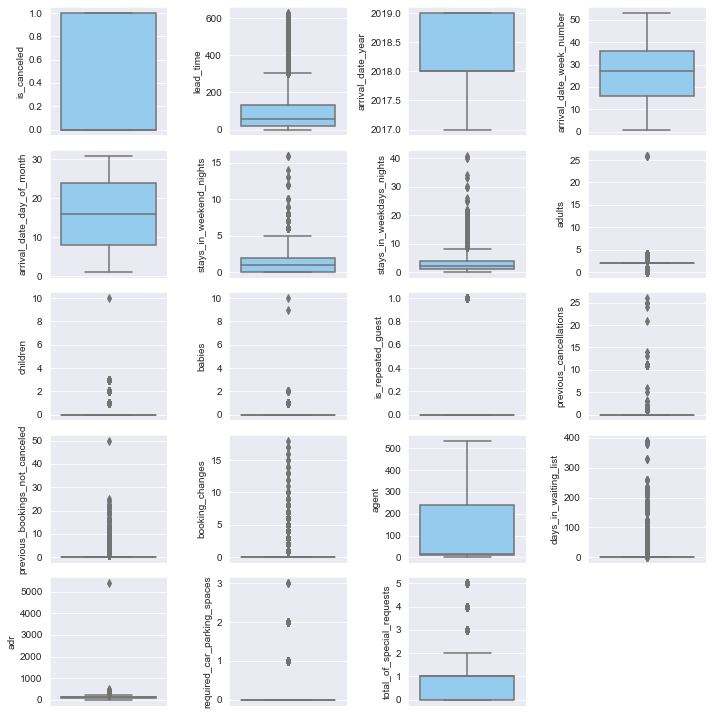

In [62]:
numericals = ['is_canceled','lead_time','arrival_date_year','arrival_date_week_number',
              'arrival_date_day_of_month','stays_in_weekend_nights','stays_in_weekdays_nights',
              'adults','children','babies','is_repeated_guest','previous_cancellations',
              'previous_bookings_not_canceled','booking_changes','agent','days_in_waiting_list',
              'adr','required_car_parking_spaces','total_of_special_requests']
categoricals = ['hotel','arrival_date_month','meal','city','market_segment','distribution_channel',
                'deposit_type','customer_type','reservation_status']

feat_num = numericals
plt.figure(figsize=(10,10))
for i in range(0,len(feat_num)):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df[feat_num[i]], color = 'lightskyblue', orient = 'v')
    plt.tight_layout()

Outliers terdapat pada kolom :
1. lead_time
2. stays_in_weekend_nights
3. stays_in_weekdays_nights
4. adults
5. children
6. babies
7. is_repeated_guest
8. previous_cancellations
9. previous_bookings_not_canceled
10. booking_changes
11. days_in_waiting_list
12. adr
13. required_car_parking_spaces
14. total_of_special_requests

#### IQR

In [63]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for i in ['lead_time','stays_in_weekend_nights','stays_in_weekdays_nights',
              'adults','children','babies','previous_cancellations',
              'previous_bookings_not_canceled','booking_changes','days_in_waiting_list',
              'adr','required_car_parking_spaces','total_of_special_requests']:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[i] >= low_limit) & (df[i] <= high_limit)) & filtered_entries

df_iqr = df[filtered_entries]    
    
print(f'Jumlah baris setelah memfilter outlier: {len(df_iqr)}')


Jumlah baris sebelum memfilter outlier: 74061
Jumlah baris setelah memfilter outlier: 36794


#### Z-Score

In [64]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,0,No Deposit,304,0,Personal,75,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,0,No Deposit,240,0,Personal,98,0,1,Check-Out
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,...,0,0,No Deposit,303,0,Personal,103,0,1,Check-Out
8,Resort Hotel,1,85,2017,September,27,1,0,3,2,...,0,0,No Deposit,240,0,Personal,82,0,1,Canceled
9,Resort Hotel,1,75,2017,September,27,1,0,3,2,...,0,0,No Deposit,15,0,Personal,105,0,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,...,0,0,No Deposit,394,0,Personal,96,0,0,Check-Out
119386,City Hotel,0,102,2019,October,35,31,2,5,3,...,0,0,No Deposit,9,0,Personal,225,0,2,Check-Out
119387,City Hotel,0,34,2019,October,35,31,2,5,2,...,0,0,No Deposit,9,0,Personal,157,0,4,Check-Out
119388,City Hotel,0,109,2019,October,35,31,2,5,2,...,0,0,No Deposit,89,0,Personal,104,0,0,Check-Out


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74061 entries, 3 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   hotel                           74061 non-null  object
 1   is_canceled                     74061 non-null  int64 
 2   lead_time                       74061 non-null  int64 
 3   arrival_date_year               74061 non-null  int64 
 4   arrival_date_month              74061 non-null  object
 5   arrival_date_week_number        74061 non-null  int64 
 6   arrival_date_day_of_month       74061 non-null  int64 
 7   stays_in_weekend_nights         74061 non-null  int64 
 8   stays_in_weekdays_nights        74061 non-null  int64 
 9   adults                          74061 non-null  int64 
 10  children                        74061 non-null  int64 
 11  babies                          74061 non-null  int64 
 12  meal                            74061 non-nul

In [66]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for i in ['lead_time','stays_in_weekend_nights','stays_in_weekdays_nights',
              'adults','children','babies','previous_cancellations',
              'previous_bookings_not_canceled','booking_changes','days_in_waiting_list',
              'adr','required_car_parking_spaces','total_of_special_requests']:
    z_scores = np.abs(stats.zscore(df[i]))
    filtered_entries = (z_scores < 2)
    
df_z = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_z)}')

Jumlah baris sebelum memfilter outlier: 74061
Jumlah baris setelah memfilter outlier: 71730


In [67]:
df_z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71730 entries, 3 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   hotel                           71730 non-null  object
 1   is_canceled                     71730 non-null  int64 
 2   lead_time                       71730 non-null  int64 
 3   arrival_date_year               71730 non-null  int64 
 4   arrival_date_month              71730 non-null  object
 5   arrival_date_week_number        71730 non-null  int64 
 6   arrival_date_day_of_month       71730 non-null  int64 
 7   stays_in_weekend_nights         71730 non-null  int64 
 8   stays_in_weekdays_nights        71730 non-null  int64 
 9   adults                          71730 non-null  int64 
 10  children                        71730 non-null  int64 
 11  babies                          71730 non-null  int64 
 12  meal                            71730 non-nul

### Karena kita tidak ingin kehilangan terlalu banyak data, maka kita menggunakan Z-score untuk menghapus outlier

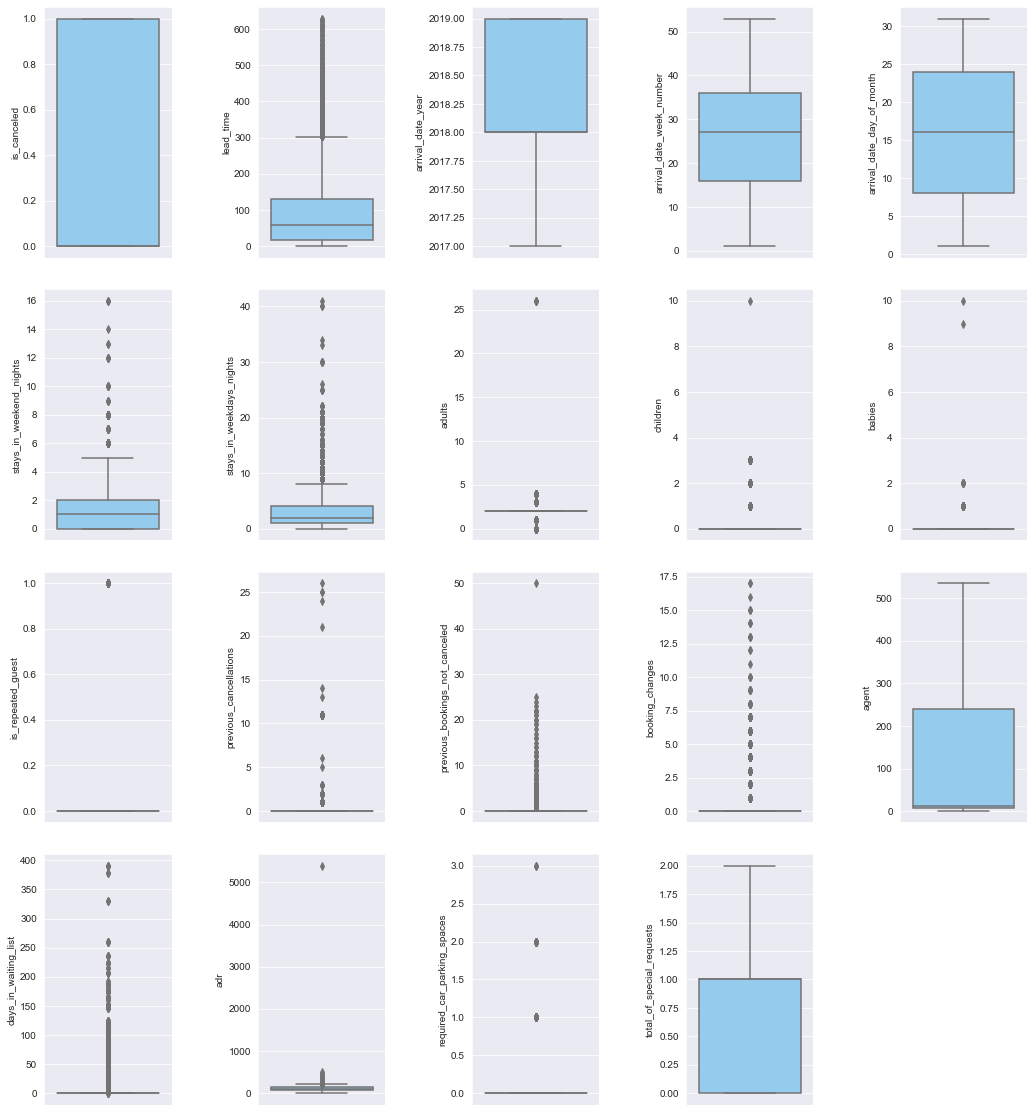

In [68]:
plt.figure(figsize=(15,20))
for i in range(0, len(feat_num)):
    plt.subplot(5, 5, i+1)
    sns.boxplot(y=df_z[feat_num[i]], color='lightskyblue', orient='v')
    plt.tight_layout(pad=3.0)

In [69]:
df_z.shape

(71730, 28)

## 2.2 Data Transformation

### a. Feature Selection

- membuang fitur - fitur yang tidak relevan 
- membuang fitur - fitur yang redundant 
- mengurangi fitur

<AxesSubplot:>

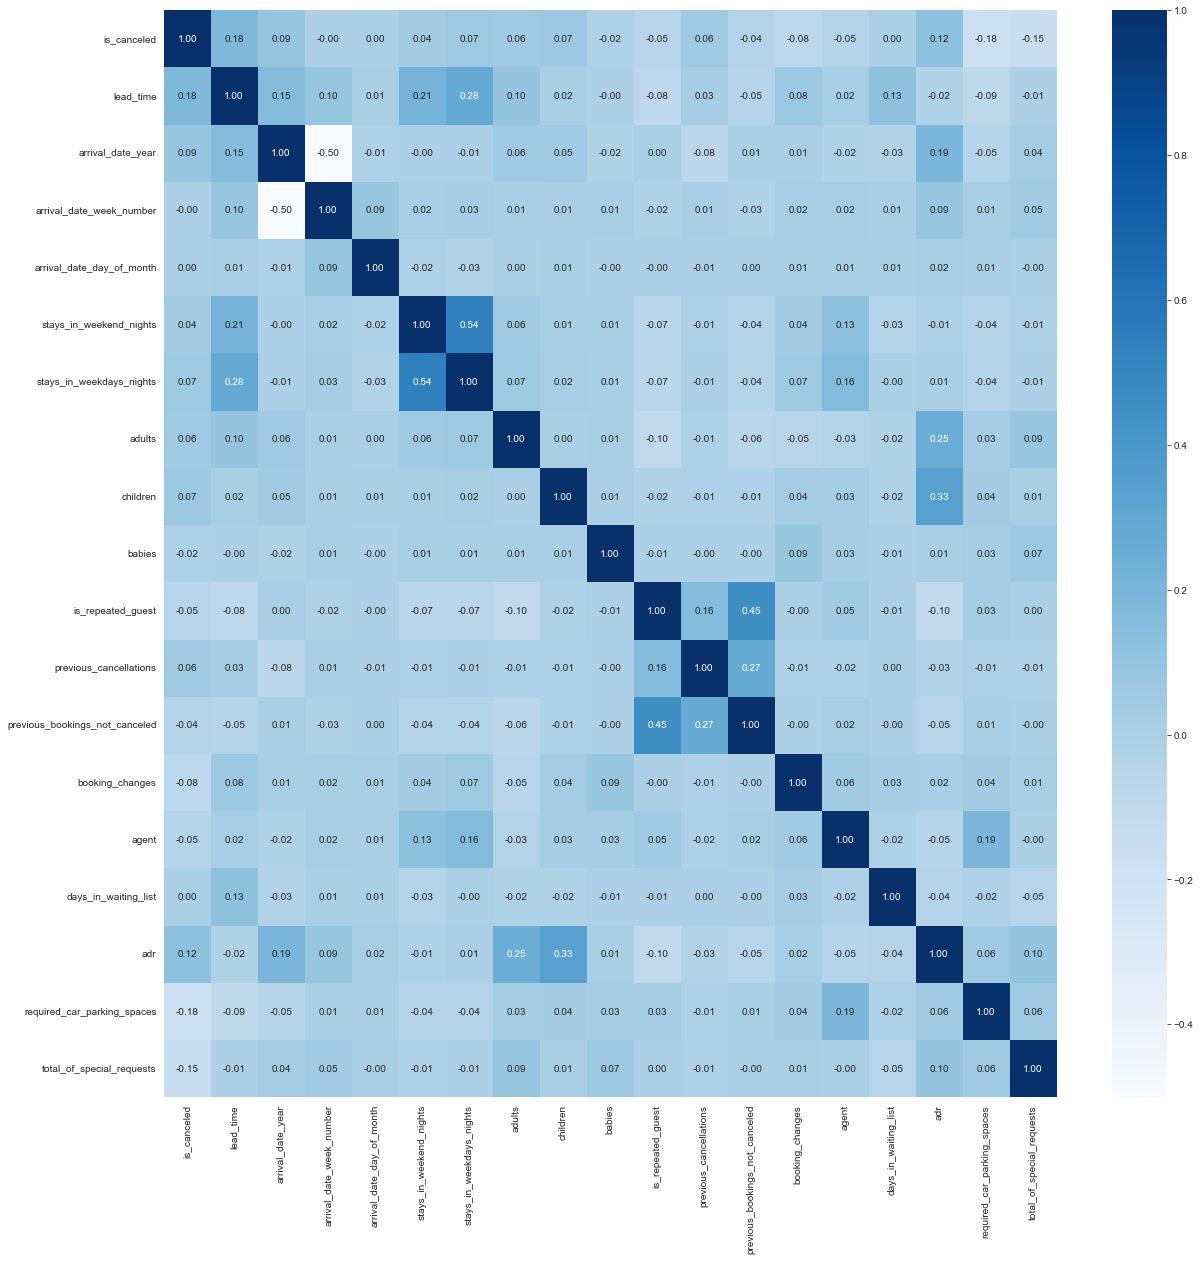

In [70]:
plt.figure(figsize=(20,20))
sns.heatmap(df_z.corr(), cmap='Blues', annot=True, fmt='.2f')

### b. Feature Encoding

#### Label Encoding

In [71]:
# from sklearn.preprocessing import LabelEncoder

# labelencoder = LabelEncoder()
# df['alamat'] = labelencoder.fit_transform(df['alamat'])
# df['jenis kelamin'] = labelencoder.fit_transform(df['jenis kelamin'])

Untuk kolom kategorikal yang memiliki nilai ordinal atau bertingkat, maka value diubah menjadi numeric yang bertingkat pula.

#### KARENA TIDAK ADA NILAI ORDINAL MAKA LANJUT ONE HOT ENCODING

#### 

#### One Hot Encoding

In [72]:
#untuk kebutuhan visualisasi
df_v = df_z

In [73]:
one_hot = pd.get_dummies(df_z['hotel'], prefix='type')
df_z = df_z.join(one_hot)
df_z = df_z.drop(columns='hotel')

In [74]:
# one_hot2 = pd.get_dummies(df_s['arrival_date_month'], prefix='arrival_month')
# df_s = df_s.join(one_hot2)
# df_s = df_s.drop(columns='arrival_date_month')

#TIDAK DILAKUKAN KARENA KUTUKAN DIMENSI

In [75]:
one_hot3 = pd.get_dummies(df_z['meal'], prefix='meal')
df_z = df_z.join(one_hot3)
df_z = df_z.drop(columns='meal')

In [76]:
# one_hot4 = pd.get_dummies(df_s['city'], prefix='city')
# df_s = df_s.join(one_hot4)
# df_s = df_s.drop(columns='city') 

#TIDAK DILAKUKAN KARENA KUTUKAN DIMENSI

In [77]:
one_hot5 = pd.get_dummies(df_z['market_segment'], prefix='segment')
df_z = df_z.join(one_hot5)
df_z = df_z.drop(columns='market_segment')

In [78]:
one_hot6 = pd.get_dummies(df_z['distribution_channel'], prefix='dist_channel')
df_z = df_z.join(one_hot6)
df_z = df_z.drop(columns='distribution_channel')

In [79]:
one_hot7 = pd.get_dummies(df_z['deposit_type'], prefix='depo_type')
df_z = df_z.join(one_hot7)
df_z = df_z.drop(columns='deposit_type')

In [80]:
one_hot8 = pd.get_dummies(df_z['customer_type'], prefix='cust_type')
df_z = df_z.join(one_hot8)
df_z = df_z.drop(columns='customer_type')

In [81]:
one_hot9 = pd.get_dummies(df_z['reservation_status'], prefix='reserv_status')
df_z = df_z.join(one_hot9)
df_z = df_z.drop(columns='reservation_status')

In [82]:
df_z

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,...,depo_type_No Deposit,depo_type_Non Refund,depo_type_Refundable,cust_type_Bussiness,cust_type_Contract,cust_type_Family,cust_type_Personal,reserv_status_Canceled,reserv_status_Check-Out,reserv_status_No-Show
3,0,13,2017,September,27,1,0,1,1,0,...,1,0,0,0,0,0,1,0,1,0
4,0,14,2017,September,27,1,0,2,2,0,...,1,0,0,0,0,0,1,0,1,0
7,0,9,2017,September,27,1,0,2,2,0,...,1,0,0,0,0,0,1,0,1,0
8,1,85,2017,September,27,1,0,3,2,0,...,1,0,0,0,0,0,1,1,0,0
9,1,75,2017,September,27,1,0,3,2,0,...,1,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119384,0,21,2019,October,35,30,2,5,2,0,...,1,0,0,0,0,0,1,0,1,0
119385,0,23,2019,October,35,30,2,5,2,0,...,1,0,0,0,0,0,1,0,1,0
119386,0,102,2019,October,35,31,2,5,3,0,...,1,0,0,0,0,0,1,0,1,0
119388,0,109,2019,October,35,31,2,5,2,0,...,1,0,0,0,0,0,1,0,1,0


#### Feature Extraction Membuat index

In [83]:
pd.RangeIndex(start=1, stop=None, step=None, dtype=None, copy=False, name=None)

RangeIndex(start=0, stop=1, step=1)

In [84]:
df_z.index = np.arange(1, len(df_z) + 1)

In [85]:
index_list = df_z.index.tolist()
index_list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [86]:
df_z['index'] = index_list

In [87]:
df_z

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,...,depo_type_Non Refund,depo_type_Refundable,cust_type_Bussiness,cust_type_Contract,cust_type_Family,cust_type_Personal,reserv_status_Canceled,reserv_status_Check-Out,reserv_status_No-Show,index
1,0,13,2017,September,27,1,0,1,1,0,...,0,0,0,0,0,1,0,1,0,1
2,0,14,2017,September,27,1,0,2,2,0,...,0,0,0,0,0,1,0,1,0,2
3,0,9,2017,September,27,1,0,2,2,0,...,0,0,0,0,0,1,0,1,0,3
4,1,85,2017,September,27,1,0,3,2,0,...,0,0,0,0,0,1,1,0,0,4
5,1,75,2017,September,27,1,0,3,2,0,...,0,0,0,0,0,1,1,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71726,0,21,2019,October,35,30,2,5,2,0,...,0,0,0,0,0,1,0,1,0,71726
71727,0,23,2019,October,35,30,2,5,2,0,...,0,0,0,0,0,1,0,1,0,71727
71728,0,102,2019,October,35,31,2,5,3,0,...,0,0,0,0,0,1,0,1,0,71728
71729,0,109,2019,October,35,31,2,5,2,0,...,0,0,0,0,0,1,0,1,0,71729


#### 

membuat fitur total_guest untuk menghindari nilai ambigu pada kolom adults, children, babies.

In [88]:
#new column total_guest

df_z['total_guest'] = df_z['adults'] + df_z['children'] + df_z['babies'] 

df_z

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,...,depo_type_Refundable,cust_type_Bussiness,cust_type_Contract,cust_type_Family,cust_type_Personal,reserv_status_Canceled,reserv_status_Check-Out,reserv_status_No-Show,index,total_guest
1,0,13,2017,September,27,1,0,1,1,0,...,0,0,0,0,1,0,1,0,1,1
2,0,14,2017,September,27,1,0,2,2,0,...,0,0,0,0,1,0,1,0,2,2
3,0,9,2017,September,27,1,0,2,2,0,...,0,0,0,0,1,0,1,0,3,2
4,1,85,2017,September,27,1,0,3,2,0,...,0,0,0,0,1,1,0,0,4,2
5,1,75,2017,September,27,1,0,3,2,0,...,0,0,0,0,1,1,0,0,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71726,0,21,2019,October,35,30,2,5,2,0,...,0,0,0,0,1,0,1,0,71726,2
71727,0,23,2019,October,35,30,2,5,2,0,...,0,0,0,0,1,0,1,0,71727,2
71728,0,102,2019,October,35,31,2,5,3,0,...,0,0,0,0,1,0,1,0,71728,3
71729,0,109,2019,October,35,31,2,5,2,0,...,0,0,0,0,1,0,1,0,71729,2


In [89]:
df_z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71730 entries, 1 to 71730
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   is_canceled                     71730 non-null  int64 
 1   lead_time                       71730 non-null  int64 
 2   arrival_date_year               71730 non-null  int64 
 3   arrival_date_month              71730 non-null  object
 4   arrival_date_week_number        71730 non-null  int64 
 5   arrival_date_day_of_month       71730 non-null  int64 
 6   stays_in_weekend_nights         71730 non-null  int64 
 7   stays_in_weekdays_nights        71730 non-null  int64 
 8   adults                          71730 non-null  int64 
 9   children                        71730 non-null  int64 
 10  babies                          71730 non-null  int64 
 11  city                            71730 non-null  object
 12  is_repeated_guest               71730 non-null

In [90]:
df_z['total_guest'].value_counts()

2     49472
1      9952
3      8618
4      3468
0       111
5       101
26        5
12        2
10        1
Name: total_guest, dtype: int64

In [91]:
df_z['total_guest'].unique()

array([ 1,  2,  3,  4,  5, 12, 26,  0, 10], dtype=int64)

In [92]:
df_z[df_z['total_guest'].isin([0])]

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,...,depo_type_Refundable,cust_type_Bussiness,cust_type_Contract,cust_type_Family,cust_type_Personal,reserv_status_Canceled,reserv_status_Check-Out,reserv_status_No-Show,index,total_guest
2325,0,36,2017,January,47,20,1,2,0,0,...,0,0,0,1,0,0,1,0,2325,0
2572,0,165,2017,February,53,30,1,4,0,0,...,0,0,0,1,0,0,1,0,2572,0
2578,0,165,2017,February,53,30,2,4,0,0,...,0,0,0,1,0,0,1,0,2578,0
20510,0,4,2019,March,2,14,0,1,0,0,...,0,0,0,1,0,0,1,0,20510,0
26304,0,132,2017,September,30,23,2,5,0,0,...,0,0,0,1,0,0,1,0,26304,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68180,0,26,2019,August,25,19,1,4,0,0,...,0,0,0,0,1,0,1,0,68180,0
68459,0,107,2019,August,26,27,0,3,0,0,...,0,0,0,0,1,0,1,0,68459,0
69348,0,44,2019,September,28,15,1,1,0,0,...,0,0,0,0,1,0,1,0,69348,0
69578,0,2,2019,September,28,15,2,5,0,0,...,0,0,0,1,0,0,1,0,69578,0


In [93]:
df_z.shape

(71730, 50)

In [94]:
df_z

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,...,depo_type_Refundable,cust_type_Bussiness,cust_type_Contract,cust_type_Family,cust_type_Personal,reserv_status_Canceled,reserv_status_Check-Out,reserv_status_No-Show,index,total_guest
1,0,13,2017,September,27,1,0,1,1,0,...,0,0,0,0,1,0,1,0,1,1
2,0,14,2017,September,27,1,0,2,2,0,...,0,0,0,0,1,0,1,0,2,2
3,0,9,2017,September,27,1,0,2,2,0,...,0,0,0,0,1,0,1,0,3,2
4,1,85,2017,September,27,1,0,3,2,0,...,0,0,0,0,1,1,0,0,4,2
5,1,75,2017,September,27,1,0,3,2,0,...,0,0,0,0,1,1,0,0,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71726,0,21,2019,October,35,30,2,5,2,0,...,0,0,0,0,1,0,1,0,71726,2
71727,0,23,2019,October,35,30,2,5,2,0,...,0,0,0,0,1,0,1,0,71727,2
71728,0,102,2019,October,35,31,2,5,3,0,...,0,0,0,0,1,0,1,0,71728,3
71729,0,109,2019,October,35,31,2,5,2,0,...,0,0,0,0,1,0,1,0,71729,2


In [95]:
df_z = df_z[df_z['total_guest']!=0]

In [96]:
df_z.shape

(71619, 50)

In [97]:
df_z[df_z['total_guest'].isin([0])]

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,...,depo_type_Refundable,cust_type_Bussiness,cust_type_Contract,cust_type_Family,cust_type_Personal,reserv_status_Canceled,reserv_status_Check-Out,reserv_status_No-Show,index,total_guest


In [98]:
df_z['total_guest'].unique()

array([ 1,  2,  3,  4,  5, 12, 26, 10], dtype=int64)

#### 

### C. Class Imbalance

In [99]:
df_z['is_canceled'].value_counts() 

0    49808
1    21811
Name: is_canceled, dtype: int64

In [100]:
df_z['is_canceled'].shape

(71619,)

1. 49808/71619*100 = 69,54 %
2. 21811/71619*100 = 30,45 %

Cek ukuran kelas imbalance

#### 

### d. Feature Scaling

#### Min / Max Normalization Skip

#### Standarization skip

In [101]:
# for col in feat_num:
#     df_z[col]= StandardScaler().fit_transform(df_z[col].values.reshape(len(df_z), 1))

In [102]:
# df_s = df_z
# df_s

#### Log Tranformation

In [103]:
# df_z.describe()

In [104]:
# sns.kdeplot(df_z['lead_time'])
# plt.show()

In [105]:
# df_log = df_z

In [106]:
# df_log

In [107]:
# df_log['log_lead_time'] = np.log(df_log['lead_time'])
# df_log['log_stays_in_weekend_nights'] = np.log(df_log['stays_in_weekend_nights'])
# df_log['log_stays_in_weekdays_nights'] = np.log(df_log['stays_in_weekdays_nights'])
# df_log['log_adults'] = np.log(df_log['adults'])
# df_log['log_children'] = np.log(df_log['children'])
# df_log['log_babies'] = np.log(df_log['babies'])
# df_log['log_is_repeated_guest'] = np.log(df_log['is_repeated_guest'])
# df_log['log_previous_cancellations'] = np.log(df_log['previous_cancellations'])
# df_log['log_previous_bookings_not_canceled'] = np.log(df_log['previous_bookings_not_canceled'])
# df_log['log_booking_changes'] = np.log(df_log['booking_changes'])
# df_log['log_agent'] = np.log(df_log['agent'])
# df_log['log_days_in_waiting_list'] = np.log(df_log['days_in_waiting_list'])
# df_log['log_adr'] = np.log(df_log['adr'])
# df_log['log_required_car_parking_spaces'] = np.log(df_log['required_car_parking_spaces'])
# df_log['log_total_of_special_requests'] = np.log(df_log['total_of_special_requests'])

In [108]:
# sns.kdeplot(df_log['log_total_of_special_requests'])

#### KENAPA VALUE SETELAH DI LOG BERNILAI -INF ?

In [109]:
# df_s.describe()

In [110]:
# df_s

In [111]:
# df_s.info()

In [112]:
# feat_cat

In [113]:
# df_s['arrival_date_month'].unique()

#### 

### d. Dimentionality Reduction

- mereduksi / mengurangi dimensi fitur kedalam dimensi yang lebih rendah. Ex : PCA

#### 

# TASK 2

In [114]:
df_v

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,0,No Deposit,304,0,Personal,75,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,0,No Deposit,240,0,Personal,98,0,1,Check-Out
7,Resort Hotel,0,9,2017,September,27,1,0,2,2,...,0,0,No Deposit,303,0,Personal,103,0,1,Check-Out
8,Resort Hotel,1,85,2017,September,27,1,0,3,2,...,0,0,No Deposit,240,0,Personal,82,0,1,Canceled
9,Resort Hotel,1,75,2017,September,27,1,0,3,2,...,0,0,No Deposit,15,0,Personal,105,0,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119384,City Hotel,0,21,2019,October,35,30,2,5,2,...,0,0,No Deposit,394,0,Personal,96,0,2,Check-Out
119385,City Hotel,0,23,2019,October,35,30,2,5,2,...,0,0,No Deposit,394,0,Personal,96,0,0,Check-Out
119386,City Hotel,0,102,2019,October,35,31,2,5,3,...,0,0,No Deposit,9,0,Personal,225,0,2,Check-Out
119388,City Hotel,0,109,2019,October,35,31,2,5,2,...,0,0,No Deposit,89,0,Personal,104,0,0,Check-Out


In [115]:
df_v.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71730 entries, 3 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   hotel                           71730 non-null  object
 1   is_canceled                     71730 non-null  int64 
 2   lead_time                       71730 non-null  int64 
 3   arrival_date_year               71730 non-null  int64 
 4   arrival_date_month              71730 non-null  object
 5   arrival_date_week_number        71730 non-null  int64 
 6   arrival_date_day_of_month       71730 non-null  int64 
 7   stays_in_weekend_nights         71730 non-null  int64 
 8   stays_in_weekdays_nights        71730 non-null  int64 
 9   adults                          71730 non-null  int64 
 10  children                        71730 non-null  int64 
 11  babies                          71730 non-null  int64 
 12  meal                            71730 non-nul

In [116]:
df_v['arrival_date_month'].unique()

array(['September', 'October', 'November', 'December', 'January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August'],
      dtype=object)

In [117]:
df_v.groupby(['hotel','arrival_date_year','arrival_date_month']).agg({'is_canceled' : 'count'})

is_canceled
hotel        arrival_date_year arrival_date_month             
City Hotel   2017              December                   1224
                               February                    798
                               January                     625
                               November                   1287
                               October                     806
                               September                   350
             2018              April                      1344
                               August                     2005
                               December                   2239
                               February                   1725
                               January                    1692
                               July                       1973
                               June                       2183
                               March                       841
                               May                        2075
                               November                   2183
                               October                    2559
                               September                  2233
             2019              April                      1627
                               August                     2383
                               July                       2612
                               June                       2295
                               March                      1390
                               May                        2166
                               October                    2397
                               September                  2568
Resort Hotel 2017              December                    739
                               February                    689
                               January                     616
                               November                    966
                               October                    1052
                               September                  1087
             2018              April                       787
                               August                     1042
                               December                   1022
                               February                    822
                               January                     919
                               July                       1100
                               June                       1037
                               March                       533
                               May                        1072
                               November                   1024
                               October                    1408
                               September                  1152
             2019              April                       970
                               August                     1303
                               July                       1249
                               June                       1130
                               March                       749
                               May                         779
                               October                    1452
                               September                  1451

In [118]:
df_v.groupby(['hotel','arrival_date_year','arrival_date_month']).agg({'is_canceled' : 'count'}).reset_index()
df_v2 = df_v.groupby(['hotel','arrival_date_year','arrival_date_month']).agg({'is_canceled' : 'count'}).reset_index()

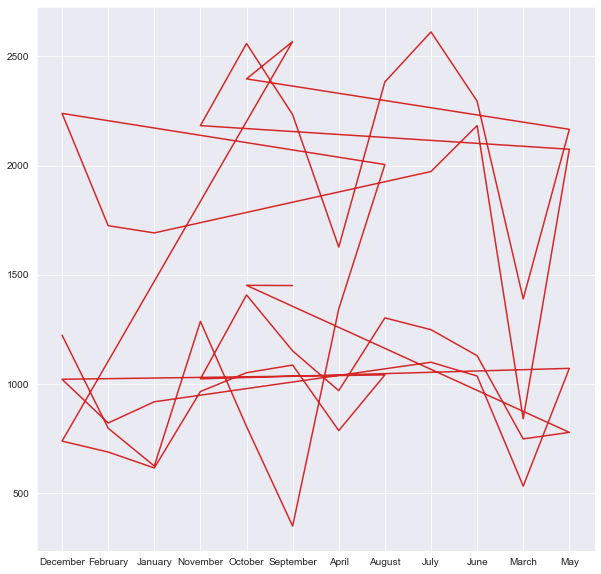

In [119]:
plt.figure(figsize=(10,10))
plt.plot('arrival_date_month', 'is_canceled', data=df_v2, color='tab:red')

In [120]:
df_v3 = df_v.groupby('hotel').agg({'is_canceled' : 'count'}).reset_index()
df_v3

,hotel,is_canceled
0,City Hotel,45580
1,Resort Hotel,26150


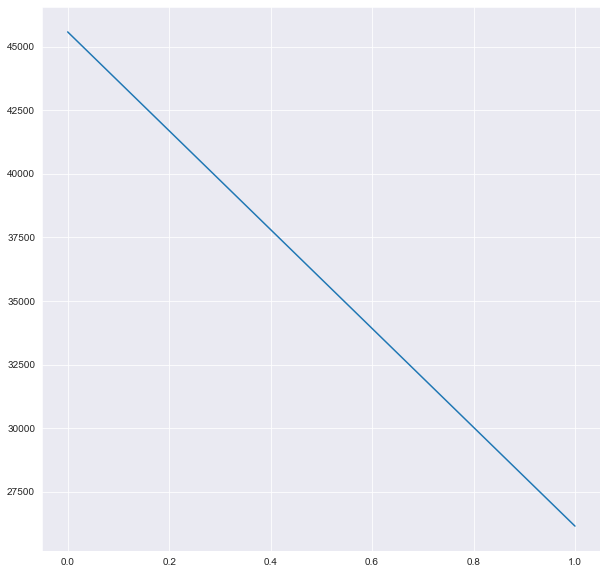

In [121]:
plt.figure(figsize=(10,10))
plt.plot('is_canceled',data=df_v3)

In [122]:
df_v['arrival_date_month'].unique()

array(['September', 'October', 'November', 'December', 'January',
       'February', 'March', 'April', 'May', 'June', 'July', 'August'],
      dtype=object)

In [123]:
df_v.groupby(['arrival_date_month']).agg({'is_canceled' : 'count'})

,is_canceled
arrival_date_month,
April,4728
August,6733
December,5224
February,4034
January,3852
July,6934
June,6645
March,3513
May,6092


In [124]:
#merubah bulan ke angka

def bulan(x):
    if x['arrival_date_month'] == 'January':
        bulan = 1
    elif x['arrival_date_month'] == 'February':
        bulan = 2
    elif x['arrival_date_month'] == 'March':
        bulan = 3
    elif x['arrival_date_month'] == 'April':
        bulan = 4    
    elif x['arrival_date_month'] == 'May':
        bulan = 5    
    elif x['arrival_date_month'] == 'June':
        bulan = 6    
    elif x['arrival_date_month'] == 'July':
        bulan = 7    
    elif x['arrival_date_month'] == 'August':
        bulan = 8
    elif x['arrival_date_month'] == 'September':
        bulan = 9         
    elif x['arrival_date_month'] == 'October':
        bulan = 10         
    elif x['arrival_date_month'] == 'November':
        bulan = 11          
    else:
        bulan = 12
    return bulan     


In [125]:
#mengganti value di kolom meal yang tidak sesuai
df_v['arrival_date_month'] = df_v.apply(lambda x: bulan(x), axis=1)

In [126]:
df_v['arrival_date_month'].unique()

array([ 9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64)

In [127]:
df_v

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
3,Resort Hotel,0,13,2017,9,27,1,0,1,1,...,0,0,No Deposit,304,0,Personal,75,0,0,Check-Out
4,Resort Hotel,0,14,2017,9,27,1,0,2,2,...,0,0,No Deposit,240,0,Personal,98,0,1,Check-Out
7,Resort Hotel,0,9,2017,9,27,1,0,2,2,...,0,0,No Deposit,303,0,Personal,103,0,1,Check-Out
8,Resort Hotel,1,85,2017,9,27,1,0,3,2,...,0,0,No Deposit,240,0,Personal,82,0,1,Canceled
9,Resort Hotel,1,75,2017,9,27,1,0,3,2,...,0,0,No Deposit,15,0,Personal,105,0,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119384,City Hotel,0,21,2019,10,35,30,2,5,2,...,0,0,No Deposit,394,0,Personal,96,0,2,Check-Out
119385,City Hotel,0,23,2019,10,35,30,2,5,2,...,0,0,No Deposit,394,0,Personal,96,0,0,Check-Out
119386,City Hotel,0,102,2019,10,35,31,2,5,3,...,0,0,No Deposit,9,0,Personal,225,0,2,Check-Out
119388,City Hotel,0,109,2019,10,35,31,2,5,2,...,0,0,No Deposit,89,0,Personal,104,0,0,Check-Out


In [128]:
df_v.sort_values(['arrival_date_year','arrival_date_month'])

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
2836,Resort Hotel,1,1,2017,1,45,1,1,0,2,...,0,0,No Deposit,240,0,Personal,49,0,1,No-Show
2837,Resort Hotel,0,4,2017,1,45,1,1,0,1,...,0,0,No Deposit,240,0,Personal,39,0,0,Check-Out
2838,Resort Hotel,0,5,2017,1,45,1,1,0,2,...,0,0,No Deposit,196,0,Personal,55,0,0,Check-Out
2839,Resort Hotel,0,1,2017,1,45,1,1,0,2,...,0,1,No Deposit,240,0,Personal,44,0,1,Check-Out
2841,Resort Hotel,0,76,2017,1,45,1,2,3,2,...,0,0,No Deposit,156,0,Contract,55,0,0,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119384,City Hotel,0,21,2019,10,35,30,2,5,2,...,0,0,No Deposit,394,0,Personal,96,0,2,Check-Out
119385,City Hotel,0,23,2019,10,35,30,2,5,2,...,0,0,No Deposit,394,0,Personal,96,0,0,Check-Out
119386,City Hotel,0,102,2019,10,35,31,2,5,3,...,0,0,No Deposit,9,0,Personal,225,0,2,Check-Out
119388,City Hotel,0,109,2019,10,35,31,2,5,2,...,0,0,No Deposit,89,0,Personal,104,0,0,Check-Out


In [129]:
df_v.groupby(['hotel','arrival_date_year','arrival_date_month']).agg({'is_canceled' : 'count'})

is_canceled
hotel        arrival_date_year arrival_date_month             
City Hotel   2017              1                           625
                               2                           798
                               9                           350
                               10                          806
                               11                         1287
                               12                         1224
             2018              1                          1692
                               2                          1725
                               3                           841
                               4                          1344
                               5                          2075
                               6                          2183
                               7                          1973
                               8                          2005
                               9                          2233
                               10                         2559
                               11                         2183
                               12                         2239
             2019              3                          1390
                               4                          1627
                               5                          2166
                               6                          2295
                               7                          2612
                               8                          2383
                               9                          2568
                               10                         2397
Resort Hotel 2017              1                           616
                               2                           689
                               9                          1087
                               10                         1052
                               11                          966
                               12                          739
             2018              1                           919
                               2                           822
                               3                           533
                               4                           787
                               5                          1072
                               6                          1037
                               7                          1100
                               8                          1042
                               9                          1152
                               10                         1408
                               11                         1024
                               12                         1022
             2019              3                           749
                               4                           970
                               5                           779
                               6                          1130
                               7                          1249
                               8                          1303
                               9                          1451
                               10                         1452

In [130]:
df_city = df_v[df_v['hotel']=='City Hotel']
df_cityorder = df_city[df_city['is_canceled']==0] 
df_city2017 = df_cityorder[df_cityorder['arrival_date_year']==2017]  
df_city2017

df_city2018 = df_cityorder[df_cityorder['arrival_date_year']==2018]  
df_city2018

df_city2019 = df_cityorder[df_cityorder['arrival_date_year']==2019]  
df_city2019

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
70660,City Hotel,0,74,2019,8,25,20,0,2,3,...,0,5,No Deposit,9,0,Family,318,0,1,Check-Out
79177,City Hotel,0,0,2019,4,6,7,0,3,2,...,3,2,No Deposit,1,0,Bussiness,68,0,0,Check-Out
80802,City Hotel,0,3,2019,8,22,1,0,1,2,...,1,0,No Deposit,14,0,Personal,135,0,0,Check-Out
80820,City Hotel,0,4,2019,5,10,7,0,1,2,...,0,0,No Deposit,85,0,Personal,90,0,1,Check-Out
80952,City Hotel,0,3,2019,6,14,2,2,3,1,...,1,0,No Deposit,14,0,Personal,107,0,1,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119384,City Hotel,0,21,2019,10,35,30,2,5,2,...,0,0,No Deposit,394,0,Personal,96,0,2,Check-Out
119385,City Hotel,0,23,2019,10,35,30,2,5,2,...,0,0,No Deposit,394,0,Personal,96,0,0,Check-Out
119386,City Hotel,0,102,2019,10,35,31,2,5,3,...,0,0,No Deposit,9,0,Personal,225,0,2,Check-Out
119388,City Hotel,0,109,2019,10,35,31,2,5,2,...,0,0,No Deposit,89,0,Personal,104,0,0,Check-Out


In [131]:
df_city2017['arrival_date_year'].unique()

array([2017], dtype=int64)

In [132]:
df2 = df_city2017.groupby('arrival_date_month').agg({'is_canceled' : 'count'}).reset_index()
df3 = df2.rename(columns = {'is_canceled' : 'pemesanan'})

df4 = df_city2018.groupby('arrival_date_month').agg({'is_canceled' : 'count'}).reset_index()
df5 = df4.rename(columns = {'is_canceled' : 'pemesanan'})

df6= df_city2019.groupby('arrival_date_month').agg({'is_canceled' : 'count'}).reset_index()
df7 = df6.rename(columns = {'is_canceled' : 'pemesanan'})
df7

,arrival_date_month,pemesanan
0,3,880
1,4,1080
2,5,1497
3,6,1367
4,7,1597
5,8,1542
6,9,1630
7,10,1475


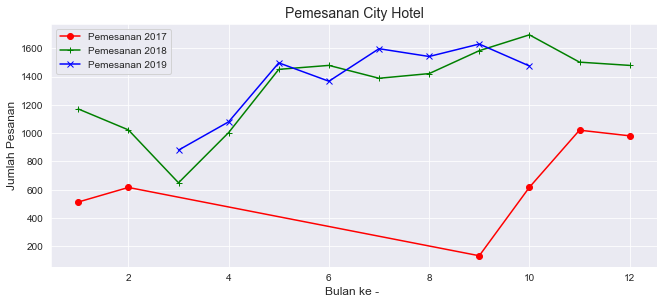

In [133]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(df3['arrival_date_month'],df3['pemesanan'],label='Pemesanan 2017',color='red',marker='o')
ax.plot(df5['arrival_date_month'],df5['pemesanan'],label='Pemesanan 2018',color='green',marker='+')
ax.plot(df7['arrival_date_month'],df7['pemesanan'],label='Pemesanan 2019',color='blue',marker='x')
ax.set_title('Pemesanan City Hotel',fontsize=14)
ax.set_xlabel('Bulan ke - ',fontsize=12)
ax.set_ylabel('Jumlah Pesanan',fontsize=12)
ax.legend(loc=0)

# ax[1].plot(df5['arrival_date_month'],df5['pemesanan'],color='green',marker='o')
# ax[1].set_title('Pemesanan City Hotel Tahun 2018',fontsize=14)
# ax[1].set_xlabel('Bulan ke - ',fontsize=12)
# ax[1].set_ylabel('Jumlah Pesanan',fontsize=12)

# ax[2].plot(df7['arrival_date_month'],df7['pemesanan'],color='blue',marker='o')
# ax[2].set_title('Pemesanan City Hotel Tahun 2019',fontsize=14)
# ax[2].set_xlabel('Bulan ke - ',fontsize=12)
# ax[2].set_ylabel('Jumlah Pesanan',fontsize=12)

fig.tight_layout(pad=3.5)

plt.show()


In [134]:
df_resort = df_v[df_v['hotel']=='Resort Hotel']
df_resortorder = df_resort[df_resort['is_canceled']==0] 
df_resort2017 = df_resortorder[df_resortorder['arrival_date_year']==2017]  
df_city2017

df_resort2018 = df_resortorder[df_resortorder['arrival_date_year']==2018]  
# df_city2018

df_resort2019 = df_resortorder[df_resortorder['arrival_date_year']==2019]  
df_resort2019

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
13806,Resort Hotel,0,7,2019,4,8,20,1,2,1,...,0,0,No Deposit,94,0,Personal,38,1,0,Check-Out
13817,Resort Hotel,0,1,2019,4,8,21,0,2,1,...,1,0,No Deposit,94,0,Family,35,0,0,Check-Out
13822,Resort Hotel,0,11,2019,4,8,20,1,2,1,...,3,0,No Deposit,94,0,Personal,35,0,0,Check-Out
13862,Resort Hotel,0,73,2019,9,29,21,2,6,2,...,0,2,No Deposit,181,0,Personal,203,1,0,Check-Out
13927,Resort Hotel,0,236,2019,8,25,23,4,10,2,...,0,0,No Deposit,240,0,Personal,138,1,2,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40054,Resort Hotel,0,169,2019,10,35,30,2,9,2,...,0,0,No Deposit,250,0,Family,204,0,1,Check-Out
40055,Resort Hotel,0,212,2019,10,35,31,2,8,2,...,0,1,No Deposit,143,0,Personal,89,0,0,Check-Out
40056,Resort Hotel,0,169,2019,10,35,30,2,9,2,...,0,0,No Deposit,250,0,Family,202,0,1,Check-Out
40058,Resort Hotel,0,211,2019,10,35,31,4,10,2,...,0,0,No Deposit,40,0,Contract,112,0,1,Check-Out


In [135]:
df_r1 = df_resort2017.groupby('arrival_date_month').agg({'is_canceled' : 'count'}).reset_index()
df_r1 = df_r1.rename(columns = {'is_canceled' : 'pemesanan'})

df_r2 = df_resort2018.groupby('arrival_date_month').agg({'is_canceled' : 'count'}).reset_index()
df_r2 = df_r2.rename(columns = {'is_canceled' : 'pemesanan'})

df_r3= df_resort2019.groupby('arrival_date_month').agg({'is_canceled' : 'count'}).reset_index()
df_r3 = df_r3.rename(columns = {'is_canceled' : 'pemesanan'})
df_r3

,arrival_date_month,pemesanan
0,3,598
1,4,727
2,5,581
3,6,784
4,7,892
5,8,805
6,9,881
7,10,850


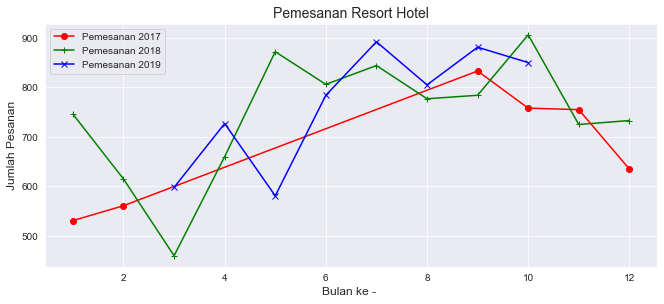

In [136]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(df_r1['arrival_date_month'],df_r1['pemesanan'],label='Pemesanan 2017',color='red',marker='o')
ax.plot(df_r2['arrival_date_month'],df_r2['pemesanan'],label='Pemesanan 2018',color='green',marker='+')
ax.plot(df_r3['arrival_date_month'],df_r3['pemesanan'],label='Pemesanan 2019',color='blue',marker='x')
ax.set_title('Pemesanan Resort Hotel',fontsize=14)
ax.set_xlabel('Bulan ke - ',fontsize=12)
ax.set_ylabel('Jumlah Pesanan',fontsize=12)
ax.legend(loc=0)

# ax[1].plot(df5['arrival_date_month'],df5['pemesanan'],color='green',marker='o')
# ax[1].set_title('Pemesanan City Hotel Tahun 2018',fontsize=14)
# ax[1].set_xlabel('Bulan ke - ',fontsize=12)
# ax[1].set_ylabel('Jumlah Pesanan',fontsize=12)

# ax[2].plot(df7['arrival_date_month'],df7['pemesanan'],color='blue',marker='o')
# ax[2].set_title('Pemesanan City Hotel Tahun 2019',fontsize=14)
# ax[2].set_xlabel('Bulan ke - ',fontsize=12)
# ax[2].set_ylabel('Jumlah Pesanan',fontsize=12)

fig.tight_layout(pad=3.5)

plt.show()

In [137]:
df_v.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71730 entries, 3 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   hotel                           71730 non-null  object
 1   is_canceled                     71730 non-null  int64 
 2   lead_time                       71730 non-null  int64 
 3   arrival_date_year               71730 non-null  int64 
 4   arrival_date_month              71730 non-null  int64 
 5   arrival_date_week_number        71730 non-null  int64 
 6   arrival_date_day_of_month       71730 non-null  int64 
 7   stays_in_weekend_nights         71730 non-null  int64 
 8   stays_in_weekdays_nights        71730 non-null  int64 
 9   adults                          71730 non-null  int64 
 10  children                        71730 non-null  int64 
 11  babies                          71730 non-null  int64 
 12  meal                            71730 non-nul

In [138]:
df_v.sample()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
35680,Resort Hotel,0,208,2019,6,16,22,2,5,1,...,0,0,No Deposit,250,0,Personal,40,0,0,Check-Out


In [139]:
df_v['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

# TASK 3

In [140]:
df_v['total_stay'] = df_v['stays_in_weekend_nights'] + df_v['stays_in_weekdays_nights'] 

In [141]:
df_v

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_stay
3,Resort Hotel,0,13,2017,9,27,1,0,1,1,...,0,No Deposit,304,0,Personal,75,0,0,Check-Out,1
4,Resort Hotel,0,14,2017,9,27,1,0,2,2,...,0,No Deposit,240,0,Personal,98,0,1,Check-Out,2
7,Resort Hotel,0,9,2017,9,27,1,0,2,2,...,0,No Deposit,303,0,Personal,103,0,1,Check-Out,2
8,Resort Hotel,1,85,2017,9,27,1,0,3,2,...,0,No Deposit,240,0,Personal,82,0,1,Canceled,3
9,Resort Hotel,1,75,2017,9,27,1,0,3,2,...,0,No Deposit,15,0,Personal,105,0,0,Canceled,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119384,City Hotel,0,21,2019,10,35,30,2,5,2,...,0,No Deposit,394,0,Personal,96,0,2,Check-Out,7
119385,City Hotel,0,23,2019,10,35,30,2,5,2,...,0,No Deposit,394,0,Personal,96,0,0,Check-Out,7
119386,City Hotel,0,102,2019,10,35,31,2,5,3,...,0,No Deposit,9,0,Personal,225,0,2,Check-Out,7
119388,City Hotel,0,109,2019,10,35,31,2,5,2,...,0,No Deposit,89,0,Personal,104,0,0,Check-Out,7


In [142]:
# df_v2 = df_v[df_v['is_canceled']==1] 

In [143]:
df_v2 = df_v[df_v['total_stay'] != 0]

In [144]:
df_v2['total_stay'].value_counts()

3     15580
2     12527
4     11994
1     11123
7      6861
5      6000
6      2911
10      989
8       943
14      795
9       674
11      306
12      169
13      111
15       52
21       49
28       30
16       28
18       22
19       20
17       17
25       14
29       13
20       12
22       10
30        9
24        5
23        4
35        4
27        4
26        4
42        4
56        2
38        1
46        1
48        1
57        1
43        1
Name: total_stay, dtype: int64

In [145]:
# Membuat klasifikasi berdasarkan fitur 'Weight_in_gms'
df_v2['kategori_durasi'] = np.where(df_v2['total_stay'] <= 7, '<= 1 Minggu', 
                           np.where(df_v2['total_stay'] <= 14, '<= 2 Minggu',
                           np.where(df_v2['total_stay'] <= 21, '<= 3 Minggu',
                           np.where(df_v2['total_stay'] <= 28, '<= 4 Minggu',
                           np.where(df_v2['total_stay'] <= 35, '<= 5 Minggu',
                           np.where(df_v2['total_stay'] <= 42, '<= 6 Minggu',
                           np.where(df_v2['total_stay'] <= 49, '<= 7 Minggu', '> 7 Minggu')
                                   )
                                   )
                                   )
                                   )
                                   ) 
                                   )

In [146]:
pd.RangeIndex(start=1, stop=None, step=None, dtype=None, copy=False, name=None)

RangeIndex(start=0, stop=1, step=1)

In [147]:
df_v2.index = np.arange(1, len(df_v2) + 1)

In [148]:
index_list = df_v2.index.tolist()
index_list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [149]:
df_v2['index'] = index_list

In [150]:
df_v22 = df_v2[df_v2['is_canceled'] == 1]

In [151]:
df_v3 = df_v2[df_v2['is_canceled'] == 1]

In [152]:
df_v4 = df_v3[df_v3['hotel'] == 'City Hotel']

In [153]:
df_v6 = df_v3[df_v3['hotel'] == 'Resort Hotel']

In [154]:
#untuk City Hotel
df_v5 = df_v4.groupby(['total_stay']).agg({'is_canceled' : 'count'}).reset_index()

#untuk Resort Hotel
df_v7 = df_v6.groupby(['total_stay']).agg({'is_canceled' : 'count'}).reset_index()

In [155]:
df_v7

,total_stay,is_canceled
0,1,569
1,2,877
2,3,968
3,4,956
4,5,714
5,6,470
6,7,1515
7,8,216
8,9,177
9,10,216


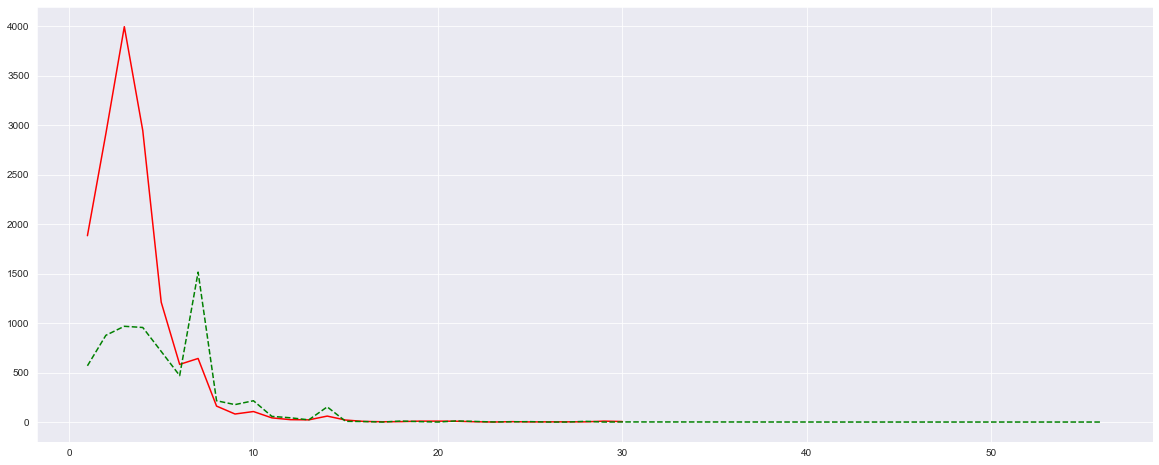

In [156]:
# plt.figure(figsize=(15,5))
# plt.plot(df_v5,color = 'g',marker='o')
# plt.ylabel('Jumlah',size=14)
# plt.xlabel('Total Stay',size=14)
# plt.title('Jumlah Pemesanan City Hotel Yang Dibatalkan',size=14)
# plt.show()

# plt.figure(figsize=(15,5))
# plt.plot(df_v5,color = 'g',marker='o')
# plt.ylabel('Jumlah',size=14)
# plt.xlabel('Total Stay',size=14)
# plt.title('Jumlah Pemesanan City Hotel Yang Dibatalkan',size=14)
# plt.show()

fig,ax = plt.subplots(1,1,figsize=(20,8))

ax.plot(df_v5['total_stay'],df_v5['is_canceled'],color='r')
ax.plot(df_v7['total_stay'],df_v7['is_canceled'],color='g',ls='--')
plt.show()

In [157]:
#membuat persentase

# df_v5['persentase'] = round(df_v5['Total_Customer']*100 / df_v5['Total_Customer'].sum(),2)

In [158]:
df_v3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21802 entries, 4 to 58895
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   hotel                           21802 non-null  object
 1   is_canceled                     21802 non-null  int64 
 2   lead_time                       21802 non-null  int64 
 3   arrival_date_year               21802 non-null  int64 
 4   arrival_date_month              21802 non-null  int64 
 5   arrival_date_week_number        21802 non-null  int64 
 6   arrival_date_day_of_month       21802 non-null  int64 
 7   stays_in_weekend_nights         21802 non-null  int64 
 8   stays_in_weekdays_nights        21802 non-null  int64 
 9   adults                          21802 non-null  int64 
 10  children                        21802 non-null  int64 
 11  babies                          21802 non-null  int64 
 12  meal                            21802 non-null

In [159]:
df_v3

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_stay,kategori_durasi,index
4,Resort Hotel,1,85,2017,9,27,1,0,3,2,...,240,0,Personal,82,0,1,Canceled,3,<= 1 Minggu,4
5,Resort Hotel,1,75,2017,9,27,1,0,3,2,...,15,0,Personal,105,0,0,Canceled,3,<= 1 Minggu,5
6,Resort Hotel,1,23,2017,9,27,1,0,4,2,...,240,0,Personal,123,0,0,Canceled,4,<= 1 Minggu,6
19,Resort Hotel,1,60,2017,9,27,1,2,5,2,...,240,0,Personal,107,0,2,Canceled,7,<= 1 Minggu,19
24,Resort Hotel,1,45,2017,9,27,2,1,3,3,...,241,0,Personal,108,0,1,Canceled,4,<= 1 Minggu,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50206,City Hotel,1,0,2018,2,52,20,0,1,1,...,94,0,Personal,65,0,2,No-Show,1,<= 1 Minggu,50206
51715,City Hotel,1,26,2018,8,27,26,2,1,2,...,9,0,Personal,152,0,0,Canceled,3,<= 1 Minggu,51715
56803,City Hotel,1,0,2018,2,51,12,1,0,2,...,341,0,Personal,77,0,2,Canceled,1,<= 1 Minggu,56803
56804,City Hotel,1,0,2018,2,51,12,1,0,2,...,341,0,Personal,0,0,2,Canceled,1,<= 1 Minggu,56804


In [160]:
# pd.RangeIndex(start=1, stop=None, step=None, dtype=None, copy=False, name=None)

In [161]:
# df_v3.index = np.arange(1, len(df_v3) + 1)

In [162]:
# index_list = df_v3.index.tolist()
# index_list

In [163]:
# df_v3['index'] = index_list

In [164]:
df_v3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21802 entries, 4 to 58895
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   hotel                           21802 non-null  object
 1   is_canceled                     21802 non-null  int64 
 2   lead_time                       21802 non-null  int64 
 3   arrival_date_year               21802 non-null  int64 
 4   arrival_date_month              21802 non-null  int64 
 5   arrival_date_week_number        21802 non-null  int64 
 6   arrival_date_day_of_month       21802 non-null  int64 
 7   stays_in_weekend_nights         21802 non-null  int64 
 8   stays_in_weekdays_nights        21802 non-null  int64 
 9   adults                          21802 non-null  int64 
 10  children                        21802 non-null  int64 
 11  babies                          21802 non-null  int64 
 12  meal                            21802 non-null

In [165]:
df_v3

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_stay,kategori_durasi,index
4,Resort Hotel,1,85,2017,9,27,1,0,3,2,...,240,0,Personal,82,0,1,Canceled,3,<= 1 Minggu,4
5,Resort Hotel,1,75,2017,9,27,1,0,3,2,...,15,0,Personal,105,0,0,Canceled,3,<= 1 Minggu,5
6,Resort Hotel,1,23,2017,9,27,1,0,4,2,...,240,0,Personal,123,0,0,Canceled,4,<= 1 Minggu,6
19,Resort Hotel,1,60,2017,9,27,1,2,5,2,...,240,0,Personal,107,0,2,Canceled,7,<= 1 Minggu,19
24,Resort Hotel,1,45,2017,9,27,2,1,3,3,...,241,0,Personal,108,0,1,Canceled,4,<= 1 Minggu,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50206,City Hotel,1,0,2018,2,52,20,0,1,1,...,94,0,Personal,65,0,2,No-Show,1,<= 1 Minggu,50206
51715,City Hotel,1,26,2018,8,27,26,2,1,2,...,9,0,Personal,152,0,0,Canceled,3,<= 1 Minggu,51715
56803,City Hotel,1,0,2018,2,51,12,1,0,2,...,341,0,Personal,77,0,2,Canceled,1,<= 1 Minggu,56803
56804,City Hotel,1,0,2018,2,51,12,1,0,2,...,341,0,Personal,0,0,2,Canceled,1,<= 1 Minggu,56804


In [166]:
df_v3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21802 entries, 4 to 58895
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   hotel                           21802 non-null  object
 1   is_canceled                     21802 non-null  int64 
 2   lead_time                       21802 non-null  int64 
 3   arrival_date_year               21802 non-null  int64 
 4   arrival_date_month              21802 non-null  int64 
 5   arrival_date_week_number        21802 non-null  int64 
 6   arrival_date_day_of_month       21802 non-null  int64 
 7   stays_in_weekend_nights         21802 non-null  int64 
 8   stays_in_weekdays_nights        21802 non-null  int64 
 9   adults                          21802 non-null  int64 
 10  children                        21802 non-null  int64 
 11  babies                          21802 non-null  int64 
 12  meal                            21802 non-null

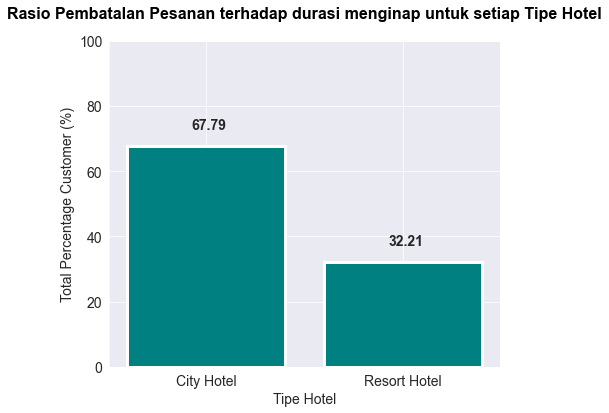

In [167]:
# df_v3['hotel'] = df_v3['hotel'].replace(('City Hotel', 'Resort Hotel'), (0,1 ))

df_v3 = df_v3.groupby(['hotel'])['index'].nunique().reset_index(name='Total_Customer')
df_v3['persentase'] = round(df_v3['Total_Customer']*100 / df_v3['Total_Customer'].sum(),2)

x = df_v3['hotel']
y = df_v3['persentase']

plt.figure(figsize=(7,6))
plt.bar(x=x, height=y,data=df_v3,
#         width = 0.5,
          color = 'teal',
#         edgecolor = 'black',
        linewidth = 3)
plt.title('Rasio Pembatalan Pesanan terhadap durasi menginap untuk setiap Tipe Hotel',
          fontsize = 16, color = 'black', fontweight = 'semibold',y=1.05)
plt.ylabel('Total Percentage Customer (%)', fontsize = 14)
plt.xlabel('Tipe Hotel', fontsize = 14)
plt.ylim(0,100)
plt.tick_params(axis='both', which='major', labelsize=14)

anotasi = range(len(x))
for i in anotasi:
    plt.text(x = anotasi[i]-0.075, y = y[i]+5, s = round(y[i],2), fontsize=14, fontweight='semibold')


In [168]:
df_v3['hotel']

0      City Hotel
1    Resort Hotel
Name: hotel, dtype: object

In [169]:
df_v3

,hotel,Total_Customer,persentase
0,City Hotel,14779,67.79
1,Resort Hotel,7023,32.21


In [170]:
df_v22 = df_v2[df_v2['is_canceled'] == 1]

In [171]:
df_v22 = df_v22.groupby(['hotel', 'kategori_durasi'])['index'].nunique().reset_index(name='Total_Customer')

In [172]:
df_v22['persentase'] = round(df_v22['Total_Customer']*100 / df_v22['Total_Customer'].sum(),2)

In [173]:
df_v22 = df_v22.sort_values('hotel')
# df_vx = df_v2.sort_values()
# df_vx

In [174]:
df_v22

,hotel,kategori_durasi,Total_Customer,persentase
0,City Hotel,<= 1 Minggu,14173,65.01
1,City Hotel,<= 2 Minggu,503,2.31
2,City Hotel,<= 3 Minggu,66,0.30
3,City Hotel,<= 4 Minggu,21,0.10
4,City Hotel,<= 5 Minggu,16,0.07
5,Resort Hotel,<= 1 Minggu,6069,27.84
6,Resort Hotel,<= 2 Minggu,888,4.07
7,Resort Hotel,<= 3 Minggu,44,0.20
8,Resort Hotel,<= 4 Minggu,17,0.08
9,Resort Hotel,<= 5 Minggu,3,0.01


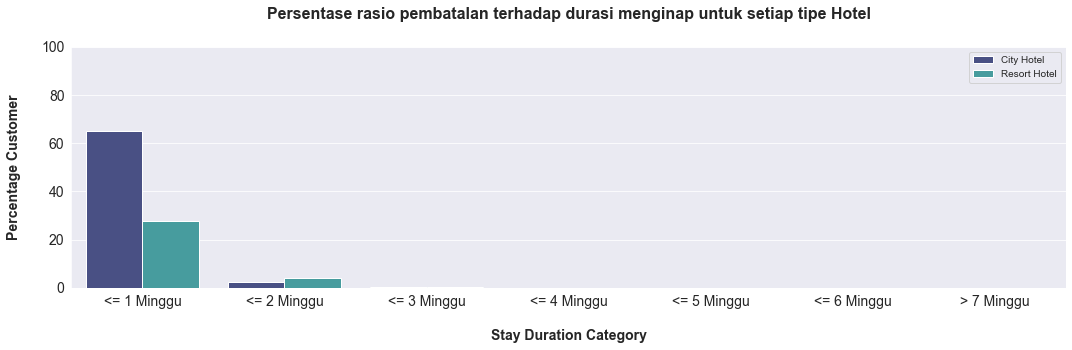

In [175]:
plt.figure(figsize = (15,5))
sns.barplot(data=df_v22, x = 'kategori_durasi', y = 'persentase', hue = 'hotel', palette='mako')
plt.title('Persentase rasio pembatalan terhadap durasi menginap untuk setiap tipe Hotel', fontsize = 16,
         y = 1.09,fontweight='bold')
plt.xlabel('Stay Duration Category', fontsize = 14,labelpad =20,fontweight='semibold')
plt.ylabel('Percentage Customer', fontsize = 14,labelpad =20,fontweight='semibold')
plt.tick_params(axis='both', which='major', labelsize=14)
plt.legend(loc=1)
plt.ylim(0,100)
plt.tight_layout()

# y2 = df_v2['persentase']
# x2 = df_v2['kategori_durasi']

# anotasi2 = range(len(x2))
# for i in anotasi2:
#     plt.text(x = anotasi2[i]-0.05, y = y2[i]+5, s = round(y2[i],2), fontsize=14, fontweight='semibold')
    


In [176]:
df_v22

,hotel,kategori_durasi,Total_Customer,persentase
0,City Hotel,<= 1 Minggu,14173,65.01
1,City Hotel,<= 2 Minggu,503,2.31
2,City Hotel,<= 3 Minggu,66,0.30
3,City Hotel,<= 4 Minggu,21,0.10
4,City Hotel,<= 5 Minggu,16,0.07
5,Resort Hotel,<= 1 Minggu,6069,27.84
6,Resort Hotel,<= 2 Minggu,888,4.07
7,Resort Hotel,<= 3 Minggu,44,0.20
8,Resort Hotel,<= 4 Minggu,17,0.08
9,Resort Hotel,<= 5 Minggu,3,0.01
